## **Gabriela Aguilar**
### Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
### Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.
### El presente proyecto analiza la base de datos "Travel Review Ratings" del repositorio de UC Irvine, con el objetivo de desarrollar un modelo capaz de predecir y recomendar una ciudad según 3 categorías indicadas y de preferencia del usuario. Esta herramienta resulta especialmente útil para programas de generación automática de itinerarios de viaje.

## **Definición del proyecto**
1. **Información base:** Se cuenta con 24 categorías referentes a diferentes tipos de atracciones turísticas en ciudades de Europa.

2. **Usuario:**
El usuario proporciona:
* Tres categorías de su preferencia.
* Una calificación del 1 al 5 para cada una, indicando su nivel de agrado o desagrado. 
3. **Modelo:** A partir de las preferencias del usuario, el modelo predice cuál es la ciudad que mejor se ajusta a sus intereses.

# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [506]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, accuracy_score, mean_absolute_error, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



In [507]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [508]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [509]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

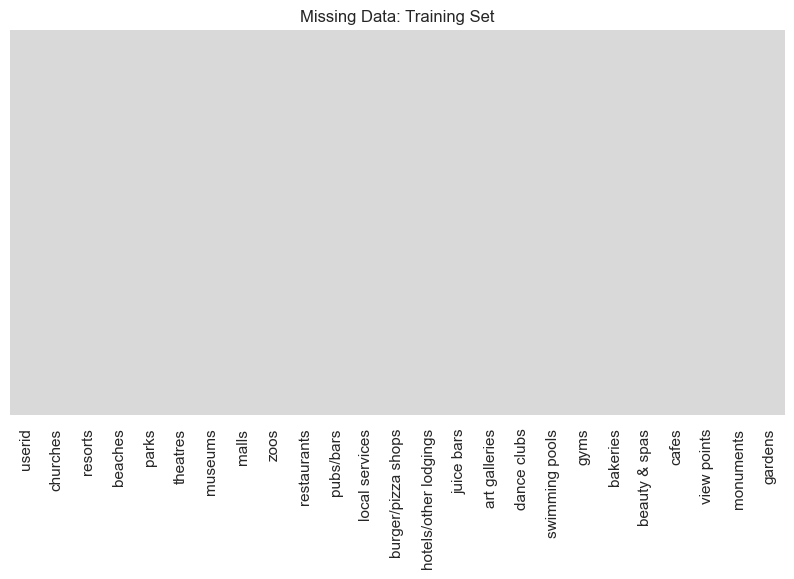

In [510]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [511]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


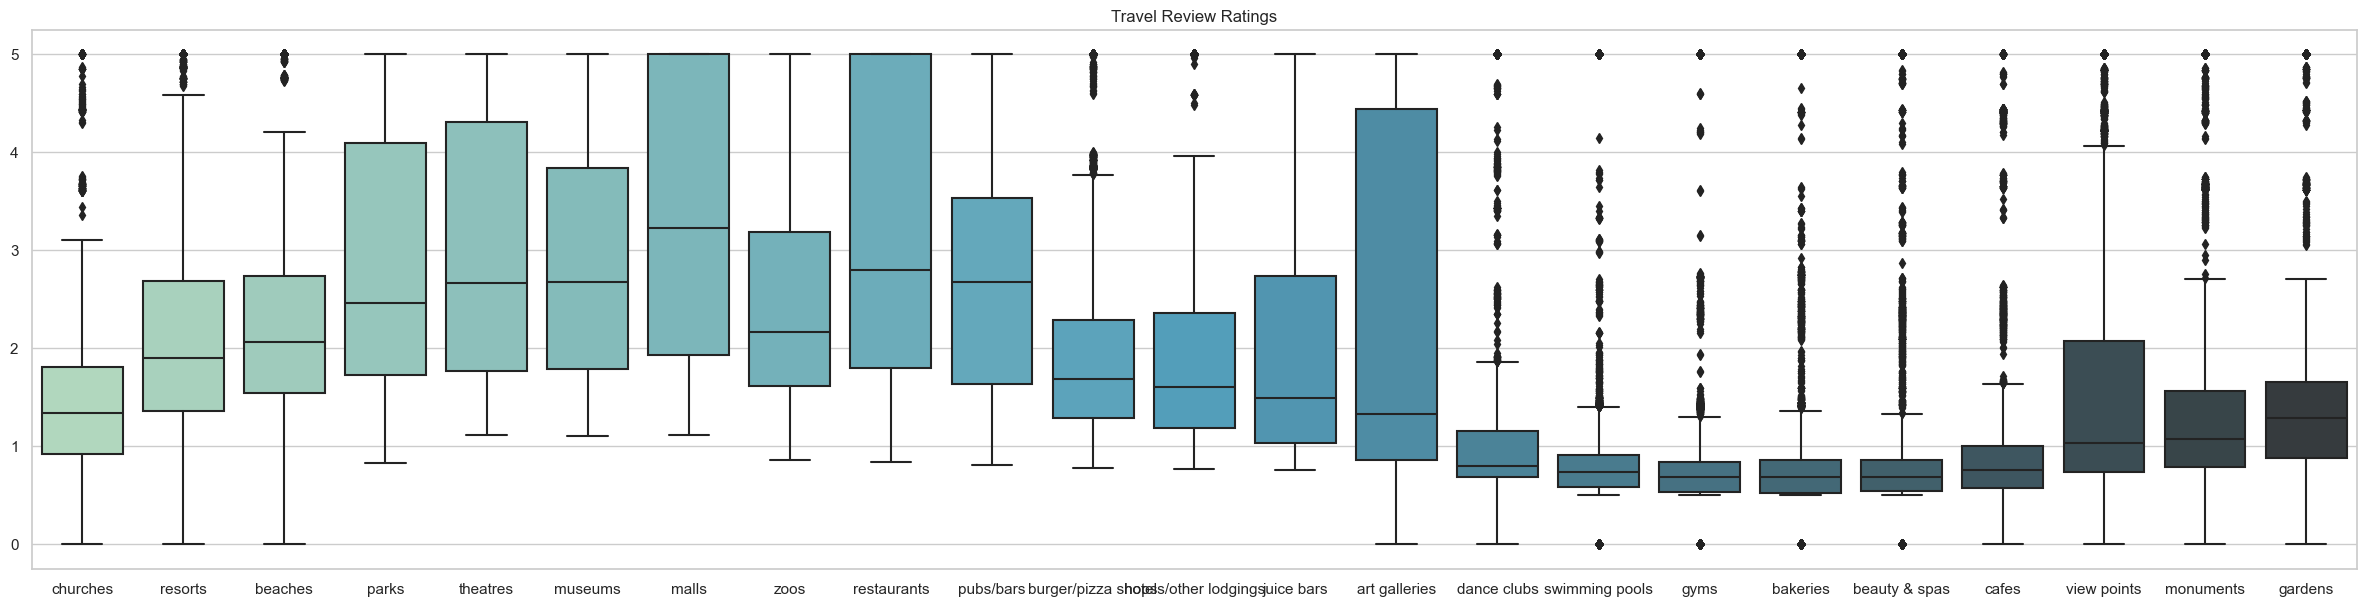

In [512]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

Las categorías 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens', 'churches', 'resorts', 'beaches', 'burger/pizza shops' y 'hotels/other lodgings' presentan valores atípicos que se desvían del rango habitual de calificaciones dentro de estas categorías.

Adicionalmente, las categorías 'malls', 'restaurants' y 'art galleries' muestran indicios de calificaciones elevadas, con algunos valores que superan el rango medio.

In [513]:
# Identificación de valores duplicados

print('Filas duplicadas:', datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

Filas duplicadas: 0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [514]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
datos['local services'] = pd.to_numeric(datos['local services'], errors='coerce')  # Ensures string values like '\t' become NaN
datos['local services'] = datos['local services'].fillna(datos['local services'].median())
datos['local services'] = datos['local services'].astype('float')

# Corrección de datos Null
# burger/pizza shops
datos['burger/pizza shops'].fillna(datos['burger/pizza shops'].median(), inplace = True)

# gardens
datos['gardens'].fillna(datos['gardens'].median(), inplace = True)

In [515]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [516]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [517]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [518]:
# 3. Basic Info
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560706
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171655
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Las categorias con promedios de ratings más altos son Avg_Malls, Avg_Restaurants, y Avg_Parks.

Las categorias con promedios de ratings más bajos son Avg_Gyms, Avg_Swimming pools, y Avg_Dance clubs.



In [519]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [520]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [521]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Asignación de Datos para Modelo de ML:**

Se asignan valores correspondientes a "Ciudades". Teniendo en cuenta la información suministrada por la base de datos (la cual indica que los ratings corresponden a ciudades de Europa https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings), se asignan nombres de ciudades de forma aleatoria con el fin de enfocar el análisis en ubicaciones específicas, facilitando así la construcción del modelo predictivo final.

In [522]:
# Agregar ciudades al random

city_list = ['London', 'Paris', 'Rome', 'Berlin', 'Barcelona', 'Amsterdam', 'Vienna', 'Prague', 'Madrid', 'Lisbon']
datos['City'] = [random.choice(city_list) for _ in range(len(datos))]
columnas = ['City'] + [col for col in datos.columns if col != 'City'] # Organizar ciudades al inicio
datos = datos[columnas]

datos['City'] = datos['City'].astype('category')

In [523]:
datos.head(10) # Nuevo orden de columnas

,City,Unique user id,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,Rome,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,Barcelona,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,Amsterdam,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Lisbon,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Lisbon,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,Amsterdam,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,Paris,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,Amsterdam,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,Madrid,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,Rome,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [524]:
import os # Extrayendo una nueva versión de los datos, sin valores nulos e incluyendo las ciudades.

os.makedirs('data', exist_ok=True)
datos.to_csv('data/my_data.csv', index=False)

file_path = os.path.abspath('data/my_data.csv')
print(f"Saved to: {file_path}")

Saved to: C:\Users\gabri\AppData\Local\Programs\Microsoft VS Code\data\my_data.csv


# **4. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [525]:
# Melt a las columnas con ratings, manteniendo City y User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['City', 'Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,City,Unique user id,Category,Rating
0,Rome,User 1,Churches,0
1,Barcelona,User 2,Churches,0
2,Amsterdam,User 3,Churches,0
3,Lisbon,User 4,Churches,0
4,Lisbon,User 5,Churches,0
...,...,...,...,...
130939,Berlin,User 5452,Gardens,2
130940,Berlin,User 5453,Gardens,1
130941,Amsterdam,User 5454,Gardens,1
130942,Lisbon,User 5455,Gardens,1


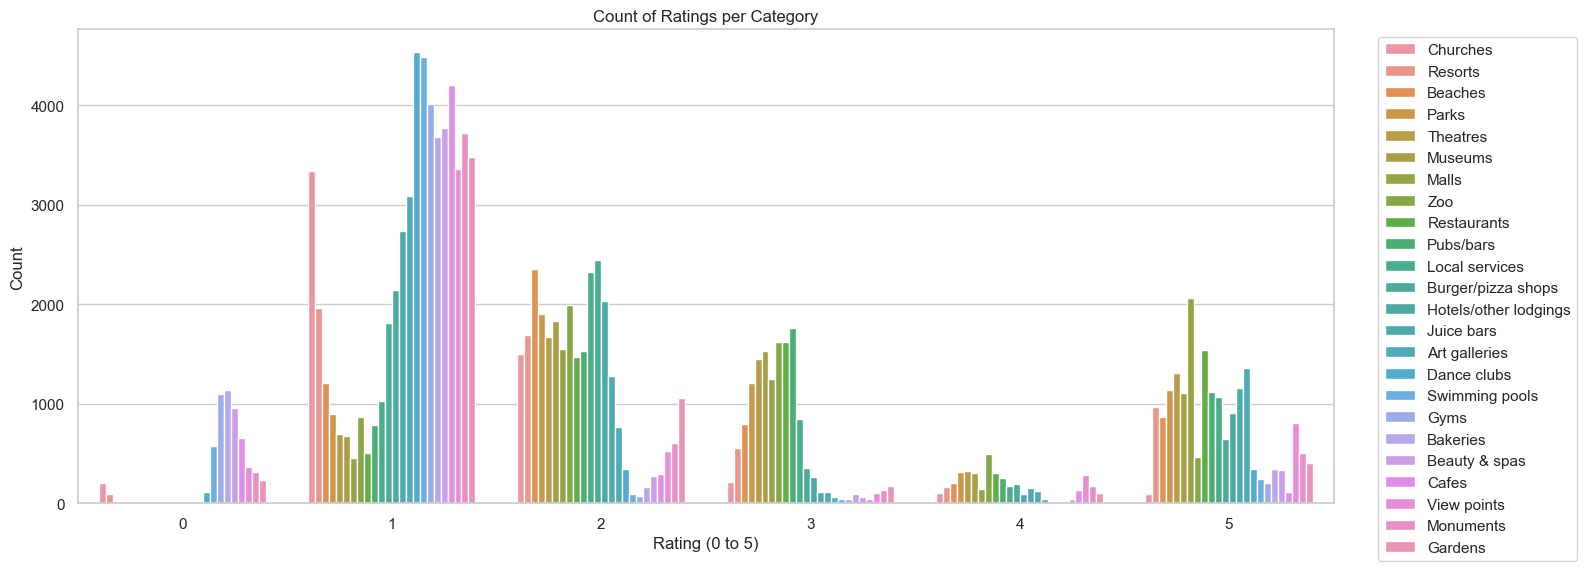

In [526]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

Se observa una concentración de calificaciones bajas en muchas categorías. En particular, Dance Clubs, Swimming Pools y Gyms muestran una alta concentración de calificaciones entre 1 y 2. De lo contrario, Malls, Restaurants y Theatres presentan una distribución más equilibrada y una mayor proporción de calificaciones altas (3–5), lo que indica un mejor desempeño. 

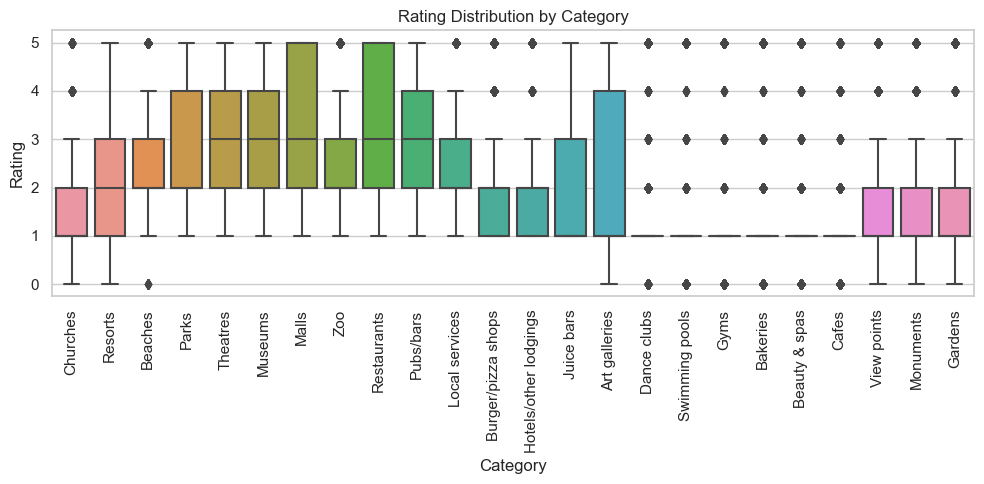

In [527]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

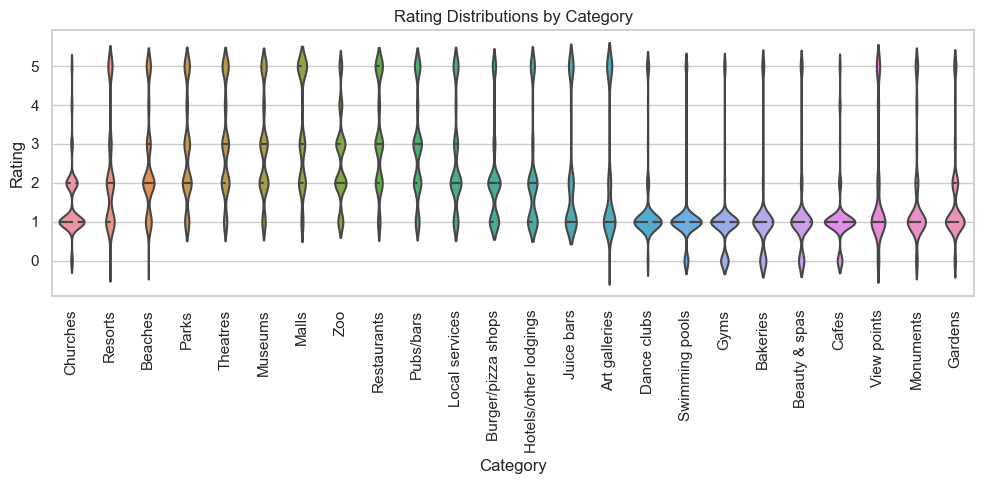

In [528]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

Esta gráfica muestra la densidad de las valoraciones en cada categoría. Por ejemplo, Malls y Restaurants presentan una mayor concentración de valoraciones de rango medio-alto, mientras que Dance Clubs, Swimming Pools y Gyms concentran la densidad en valores bajos. De igual forma, Cafes y Beauty & Spas muestran una densidad enfocada en las calificaciones más bajas.

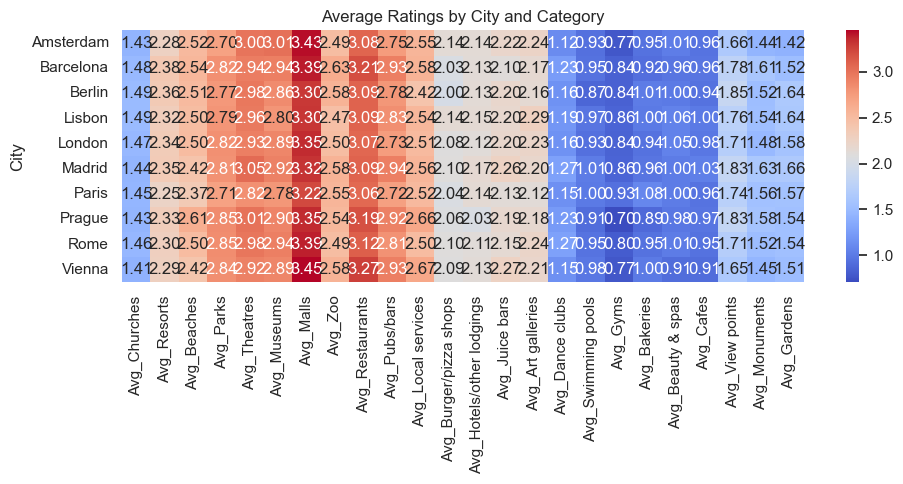

In [529]:
# Visualización con heatmap del promedio de ratings en las diferentes categorías y ciudades.
df_avg = datos.drop(columns='Unique user id').groupby('City').mean()
sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Ratings by City and Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

De acuerdo con el comportamiento observado, Malls y Restaurants registran de forma consistente las calificaciones promedio más altas en diversas ciudades, destacando especialmente Ámsterdam y Viena, que muestran puntuaciones relativamente superiores en estas categorías.

En cambio, categorías como Swimming Pools y Dance Clubs presentan calificaciones consistentemente bajas, sobre todo en ciudades como Berlín y Madrid.

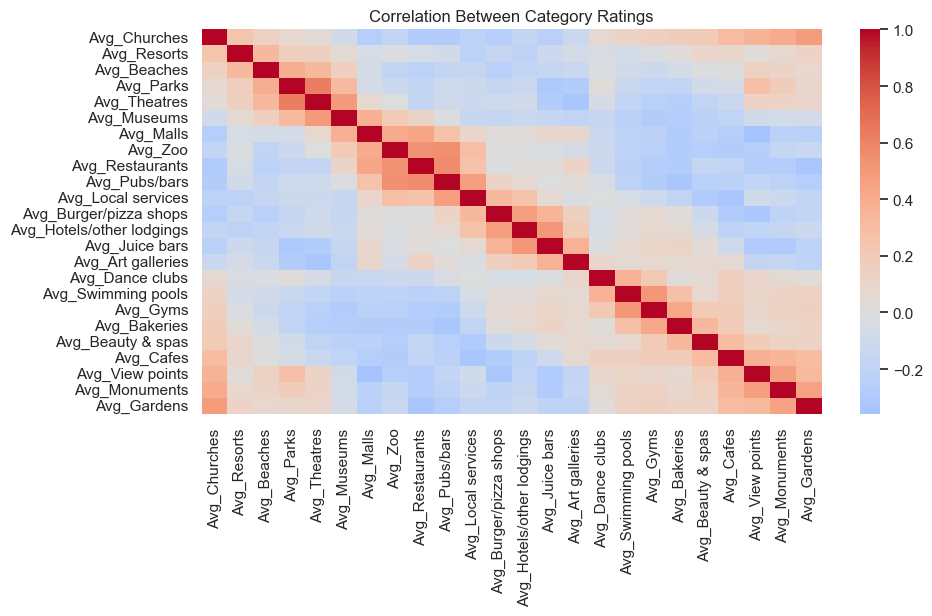

In [530]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['City', 'Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

Se observa una correlación marcada entre Malls, Restaurants, Parks y Museums, lo que sugiere que los usuarios los valoran de forma similar. Por su parte, Swimming Pools, Cafes y Dance Clubs presentan correlaciones débiles con el resto, reflejando preferencias más independientes o un desagrado más común. Finalmente, Art Galleries y Juice Bars aparecen aislados, lo que indica gustos muy específicos.

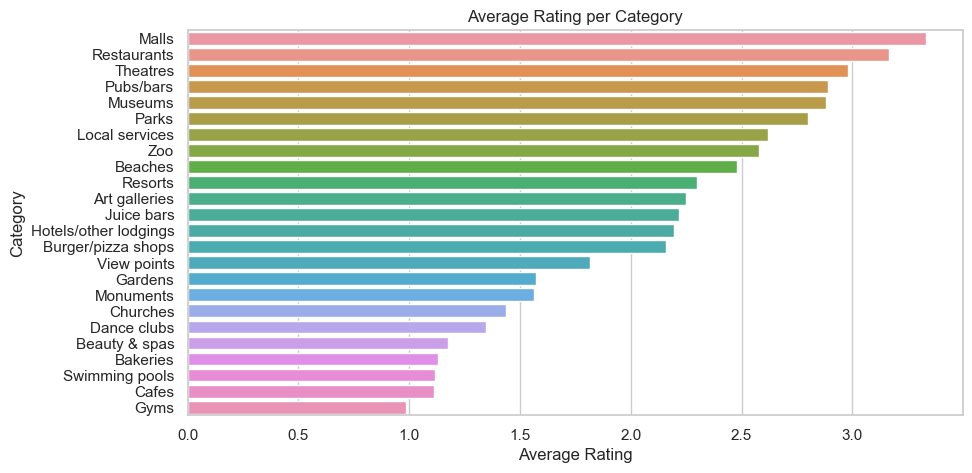

In [531]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


In [532]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City                       5456 non-null   category
 1   Unique user id             5456 non-null   category
 2   Avg_Churches               5456 non-null   float64 
 3   Avg_Resorts                5456 non-null   float64 
 4   Avg_Beaches                5456 non-null   float64 
 5   Avg_Parks                  5456 non-null   float64 
 6   Avg_Theatres               5456 non-null   float64 
 7   Avg_Museums                5456 non-null   float64 
 8   Avg_Malls                  5456 non-null   float64 
 9   Avg_Zoo                    5456 non-null   float64 
 10  Avg_Restaurants            5456 non-null   float64 
 11  Avg_Pubs/bars              5456 non-null   float64 
 12  Avg_Local services         5456 non-null   float64 
 13  Avg_Burger/pizza shops     5456 n

In [533]:
df = datos.drop(columns=['Unique user id'])
df

,City,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,Rome,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,Barcelona,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,Amsterdam,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,Lisbon,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,Lisbon,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,Berlin,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,Berlin,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,Amsterdam,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,Lisbon,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


**Label Encoder**

Biblioteca de scikit-learn (en Python) que se utiliza para convertir etiquetas categóricas (strings o valores no numéricos) en valores numéricos.

Por aplicarse en las etiquetas de Ciudades para los modelos de Machine Learning.

In [534]:
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])
n_cities = df['City'].nunique()
df['City_encoded']

0       8
1       1
2       0
3       3
4       3
       ..
5451    2
5452    2
5453    0
5454    3
5455    2
Name: City_encoded, Length: 5456, dtype: int32

**Datos de Ingreso**

Teniendo en cuenta que el input del modelo es el rating de 1 a 5 para 3 categorías seleccionadas al azar, con el objetivo de predecir la ciudad más adecuada.

Se realizan iteraciones probando distintas combinaciones aleatorias de categorías.

In [535]:
ResultadosModelos = []
n_pruebas = 20  # Número de randoms trios a evaluar

In [536]:
dfNum = df.drop('City', axis = 1)
dfNum = dfNum.drop('City_encoded', axis = 1)
dfNum

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


**Aplicando modelos ML: Random Forest, KNN, Logistic Regression, KMeans**

Modelos de clasificación (supervisados) y modelo clustering, para la predicción de la ciudad.

In [ ]:
for prueba in range(n_pruebas):
    # Generación de los trios de categorías que serán iterados
    RandomCatg = np.random.choice(dfNum.columns, 3, replace=False)
    x = df[list(RandomCatg)] # Base para la predicción
    y = df['City_encoded'] # Objetivo de predicción

    # Entrenamiento del modelo y normalización
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
    # Esto para los modelos de KNN y Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = { # Declaración de modelos a utilizar
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(), # Toma a 5 vecinos a cercanos
        'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial') # Hasta 1000 iteraciones y permite clasificación multiclase
    }

    for name, model in models.items(): # Aplicando los modelos
        if name in ['KNN', 'Logistic Regression']:
            model.fit(X_train_scaled, y_train) 
            preds = model.predict(X_test_scaled)
        else:  # Random Forest no necesita a las variables normalizadas
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds) # Calculando Accuracy
        ResultadosModelos.append({
            'Número de Iteración': prueba,
            'Modelo Utilizado': name,
            'Input de Categorías': RandomCatg,
            'Accuracy': acc
        })

    # Aplicando modelo de clustering KMeans
    kmeans = KMeans(n_clusters=n_cities, random_state=42) # Se crean clústeres por cada ciudad, que son el objetivo a predecir
    clusters = kmeans.fit_predict(X_train_scaled)
    # Métricas internas de los clústeres para pruebas con Davies Bouldin y Calinski Harabasz
    unique_clusters_train = np.unique(clusters) # Conteo de clústeres únicos de entrenamiento
    davies_train = calinski_train = np.nan # En caso de que no se tengan suficientes clústeres para pruebas

    # Solo aplicables cuando se tiene al menos 2 clústeres
    if len(unique_clusters_train) > 1:
        davies_train = davies_bouldin_score(X_train_scaled, clusters)
        calinski_train = calinski_harabasz_score(X_train_scaled, clusters)

    # Mapeo de creación de clústeres según cada ciudad
    cluster_to_city = {}
    for cluster_label in unique_clusters_train:
        indices = np.where(clusters == cluster_label)[0]
        if len(indices) > 0:
            most_common_city = y_train.iloc[indices].mode()[0]
            cluster_to_city[cluster_label] = most_common_city # Se genera Diccionario para asignar la ciudad representativa en cada caso

    # Predecir clústeres en test y calcular métricas
    test_clusters = kmeans.predict(X_test_scaled) # Predice el clúster de cada RandomCatg
    unique_clusters_test = np.unique(test_clusters)
    davies_test = calinski_test = np.nan
    if len(unique_clusters_test) > 1: # Prueba de métricas en RandomCatg
        davies_test = davies_bouldin_score(X_test_scaled, test_clusters)
        calinski_test = calinski_harabasz_score(X_test_scaled, test_clusters)

    # Convertir clústeres en predicciones de ciudades y evaluar
    preds_cluster = [cluster_to_city.get(c, -1) for c in test_clusters] # Se utiliza Diccionario para asignar Ciudad, de no coincidir se regresa -1
    if -1 in preds_cluster:
        mconfusion = np.nan
    else:
        mconfusion = confusion_matrix(y_test, preds_cluster)

    acc_cluster = accuracy_score(y_test, preds_cluster if -1 not in preds_cluster else [0]*len(y_test))
    ResultadosModelos.append({
        'Número de Iteración': prueba,
        'Modelo Utilizado': 'KMeans Clustering',
        'Input de Categorías': RandomCatg,
        'Accuracy': acc_cluster,
        'Matriz de Confusión': mconfusion
    })

# Analizando resultados
results_df = pd.DataFrame(ResultadosModelos)
print("Accuracy Promedio según cada Modelo:")
print(results_df.groupby('Modelo Utilizado')['Accuracy'].mean())
print("\nMejor Resultado entre todas las Pruebas:")
print(results_df.loc[results_df['Accuracy'].idxmax()])

# Matriz de Confusión Prueba/Modelo
best_trial_idx = results_df['Accuracy'].idxmax()
print("\nMatriz de Confusión Prueba/Modelo:")
print(results_df.loc[best_trial_idx, 'Matriz de Confusión'])

# Davies-Bouldin y Calinski-Harabasz:
if results_df.loc[best_trial_idx, 'Modelo Utilizado'] == 'KMeans Clustering':
    print("Davies-Bouldin (train):", results_df.loc[best_trial_idx, 'davies_bouldin_train'])
    print("Davies-Bouldin (test):", results_df.loc[best_trial_idx, 'davies_bouldin_test'])
    print("Calinski-Harabasz (train):", results_df.loc[best_trial_idx, 'calinski_harabasz_train'])
    print("Calinski-Harabasz (test):", results_df.loc[best_trial_idx, 'calinski_harabasz_test'])

Accuracy Promedio según cada Modelo:
Modelo Utilizado
KMeans Clustering      0.103686
KNN                    0.103365
Logistic Regression    0.102221
Random Forest          0.105884
Name: Accuracy, dtype: float64

Mejor Resultado entre todas las Pruebas:
Número de Iteración                                                        6
Modelo Utilizado                                           KMeans Clustering
Input de Categorías                     [Avg_Zoo, Avg_Museums, Avg_Theatres]
Accuracy                                                            0.128205
Matriz de Confusión        [[27, 27, 0, 0, 0, 0, 30, 1, 8, 9], [22, 44, 0...
davies_bouldin_train                                                0.870704
davies_bouldin_test                                                 0.832882
calinski_harabasz_train                                          3422.473588
calinski_harabasz_test                                            902.752767
Name: 27, dtype: object

Matriz de Confusión Prueba/

**Aplicando modelos ML: Random Forest, KNN, Logistic Regression**

Modelos de clasificación (supervisados) para la predicción de la ciudad.

In [538]:
import optuna
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, davies_bouldin_score, calinski_harabasz_score
import itertools

# Set up your dataframe and encoding (replace with your real data as appropriate)
# df = ...
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])
n_cities = df['City'].nunique()
columnas_numericas = df.columns.difference(['City', 'Unique user id', 'City_encoded'])

# Helper to return all trios or a sample
all_trios = list(itertools.combinations(columnas_numericas, 3))
if len(all_trios) > 150:  # optional, for speed
    import random
    all_trios = random.sample(all_trios, 150)

def objective(trial):
    # --- Sample features and model ---
    features = trial.suggest_categorical('features', all_trios)
    model_name = trial.suggest_categorical('model', [
        'Random Forest', 'KNN', 'Logistic Regression', 'KMeans Clustering'
    ])
    
    X = df[list(features)]
    y = df['City_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    if model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        return acc
    
    elif model_name == 'KNN':
        n_neighbors = trial.suggest_int('n_neighbors', 1, 15)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        return acc
    
    elif model_name == 'Logistic Regression':
        C = trial.suggest_loguniform('C', 1e-2, 10)
        model = LogisticRegression(C=C, max_iter=1000, multi_class='multinomial')
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        return acc
    
    else:  # KMeans Clustering
        kmeans = KMeans(n_clusters=n_cities, random_state=42)
        clusters = kmeans.fit_predict(X_train_scaled)
        # Map clusters to city labels in training
        cluster_to_city = {}
        for cluster_label in np.unique(clusters):
            indices = np.where(clusters == cluster_label)[0]
            most_common_city = y_train.iloc[indices].mode()[0]
            cluster_to_city[cluster_label] = most_common_city
        # Predict test cluster and map
        test_clusters = kmeans.predict(X_test_scaled)
        preds_cluster = [cluster_to_city.get(c, -1) for c in test_clusters]
        acc_cluster = accuracy_score(y_test, preds_cluster if -1 not in preds_cluster else [0]*len(y_test))
        return acc_cluster

# --- Run Optuna Study ---
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80)  # Increase n_trials for better search

print("Best trial:")
trial = study.best_trial
print(f"  Accuracy: {trial.value:.3f}")
print(f"  Params: {trial.params}")

# Decode and show best features
best_features = trial.params['features']
print("Best feature trio:", best_features)
print("Best model:", trial.params['model'])


[I 2025-05-18 21:15:30,662] A new study created in memory with name: no-name-46656257-75aa-4db2-b22e-34dee2d84397
[I 2025-05-18 21:15:30,690] Trial 0 finished with value: 0.1108058608058608 and parameters: {'features': ('Avg_Museums', 'Avg_Pubs/bars', 'Avg_Restaurants'), 'model': 'Logistic Regression', 'C': 0.02766417002522337}. Best is trial 0 with value: 0.1108058608058608.
[I 2025-05-18 21:15:31,140] Trial 1 finished with value: 0.08516483516483517 and parameters: {'features': ('Avg_Dance clubs', 'Avg_Juice bars', 'Avg_Monuments'), 'model': 'KMeans Clustering'}. Best is trial 0 with value: 0.1108058608058608.
[I 2025-05-18 21:15:31,587] Trial 2 finished with value: 0.09981684981684982 and parameters: {'features': ('Avg_Beauty & spas', 'Avg_Local services', 'Avg_Pubs/bars'), 'model': 'KMeans Clustering'}. Best is trial 0 with value: 0.1108058608058608.
[I 2025-05-18 21:15:32,049] Trial 3 finished with value: 0.09706959706959707 and parameters: {'features': ('Avg_Art galleries', 'Avg_

Best trial:
  Accuracy: 0.128
  Params: {'features': ('Avg_Art galleries', 'Avg_Burger/pizza shops', 'Avg_Pubs/bars'), 'model': 'KMeans Clustering'}
Best feature trio: ('Avg_Art galleries', 'Avg_Burger/pizza shops', 'Avg_Pubs/bars')
Best model: KMeans Clustering
